In [1]:
##imports
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
##reading movie reviews dataset into pandas dataframe
df = pd.read_csv('moviereviews.tsv', sep='\t')

In [3]:
##check dataframe head
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
##check dataframe shape
df.shape

(2000, 2)

In [5]:
##checking label distribution
df['label'].value_counts()

neg    1000
pos    1000
Name: label, dtype: int64

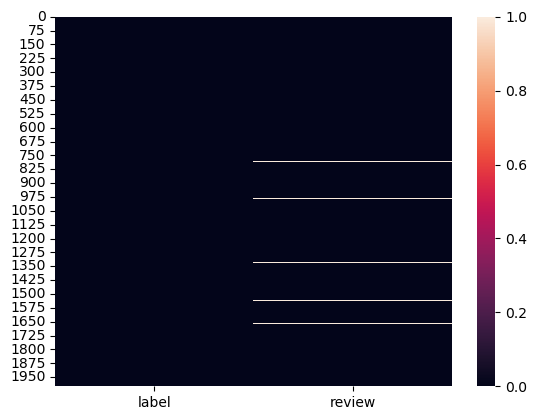

In [6]:
##checking for null values
sns.heatmap(df.isnull())

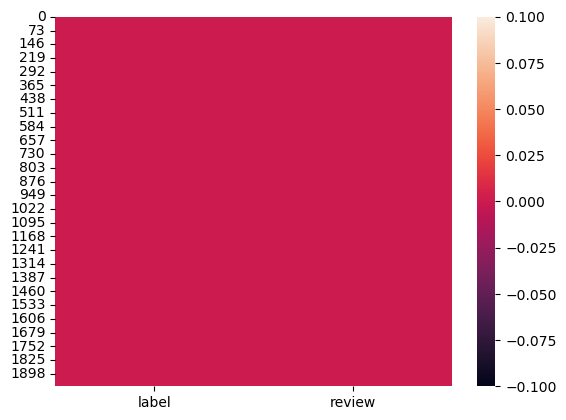

In [7]:
##deleting null values from 'review'

##indentify indices with null'review'
null_indices = df[df['review'].isnull()].index

##drop from dataframe
df.drop(null_indices, inplace=True)

##reset index
df.reset_index(inplace=True)

##drop newly created 'index' column
df.drop('index', axis=1, inplace = True)

##check for null values
sns.heatmap(df.isnull())

In [8]:
X = df['review'] ##feature
y = df['label'] ##target

##splitting the dataset

##imports
from  sklearn.model_selection import StratifiedShuffleSplit

##instantiation
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=27)

##splitting into train and test sets
for train_idx, test_idx in sss.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [9]:
##checking shape of train set
X_train.shape, y_train.shape

((1375,), (1375,))

In [10]:
##checking shape of test set
X_test.shape, y_test.shape

((590,), (590,))

In [11]:
##review vectorization

##imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

##instantiation
cnt_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

##fit transform on X_train
X_train_vector = cnt_vectorizer.fit_transform(X_train)
X_train_vector = tfidf_transformer.fit_transform(X_train_vector)

In [12]:
##checking shape of X_train_vector
X_train_vector.shape

(1375, 33486)

In [13]:
##model selection

##estimator imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

##list of estimators
estimators = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier()]

##cross validator import
from sklearn.model_selection import cross_val_score

##validative iteration
for estimator in estimators:
    scores = cross_val_score(estimator=estimator, X=X_train_vector, y=y_train, scoring='accuracy')
    avg_score = np.mean(scores)
    print(str(estimator))
    print('\n')
    print(f"avg_score:{avg_score} scores:{scores}")
    print('\n')
    print('\n')
    print('--')

C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


avg_score:0.7956731455318663 scores:[0.74509804 0.84716157 0.79475983]




--
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


avg_score:0.5258219089026521 scores:[0.52069717 0.5371179  0.51965066]




--


C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


avg_score:0.672007052861578 scores:[0.66230937 0.67248908 0.68122271]




--


C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [14]:
##choose model giving highest accuracy score => LogisticRegression

In [15]:
##creating a pipeline for model

##imports
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

##instantiation
model_pipeline = Pipeline([('vectorizer', TfidfVectorizer()),
                          ('classifier', LogisticRegression())])

In [16]:
##fit X_train, y_train on model pipeline
model_pipeline.fit(X_train, y_train)

C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':
C:\Users\abhin\anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [17]:
##predictions on X_test
preds = model_pipeline.predict(X_test)

In [21]:
##model evaluation

##target class is balanced => accuracy is suitable metric

##metric imports
from sklearn.metrics import accuracy_score, classification_report

##print accuracy
print(f"Accuracy: {accuracy_score(y_test, preds)}")
print('\n')
print('--')

##print classification report
print('\n')
print('Classification report:')
print(f"{classification_report(y_test, preds)}")

Accuracy: 0.8152542372881356


--


Classification report:
              precision    recall  f1-score   support

         neg       0.81      0.82      0.82       295
         pos       0.82      0.81      0.81       295

   micro avg       0.82      0.82      0.82       590
   macro avg       0.82      0.82      0.82       590
weighted avg       0.82      0.82      0.82       590

